In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import *
import random


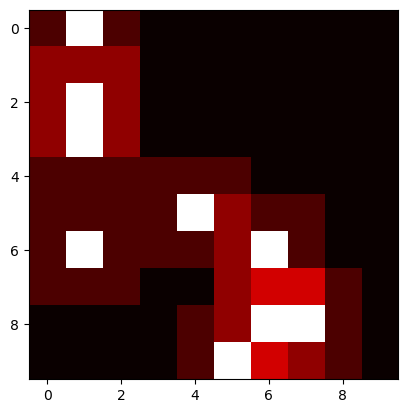

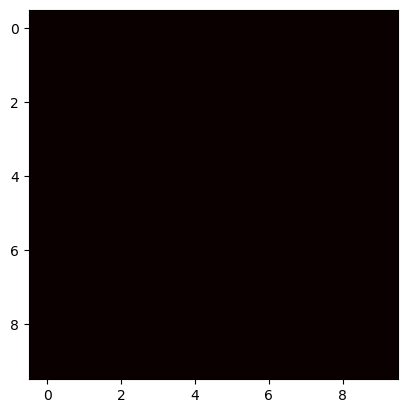

In [27]:
class Board(object):

    BOMB_VALUE = 10

    def __init__(self,size : Union[int,Tuple[int,int]]) -> None:
        assert (isinstance(size,int) and size > 0) or (isinstance(size,tuple) and len(size)==2 and size[0]>0 and size[1]>0), "Invalid size"
        self.__size = size if isinstance(size,tuple) else (size,size)
        self.__board = np.zeros(self.__size,dtype=int)
        self.__mask = np.zeros(self.__size,dtype=bool)
        self.__generate_bomb()
        self.__set_numbers()

    def __str__(self) -> str:
        return str(self.__board)
    
    def __generate_bomb(self) -> Tuple[int,int]:
        x = random.choices(np.arange(self.__size[1]),k=self.__size[1])
        y = random.choices(np.arange(self.__size[0]),k=self.__size[0])
        self.__board[x,y] = Board.BOMB_VALUE

    def __set_numbers(self) -> None:
        x,y,v = [],[],[]
        for i in range(self.__size[0]):
            for j in range(self.__size[1]):
                if self.__board[i,j] == Board.BOMB_VALUE:
                    continue
                x.append(i)
                y.append(j)
                v.append(np.count_nonzero(self.__board[max(0,i-1):min(self.__size[0],i+2),max(0,j-1):min(self.__size[1],j+2)]))
        self.__board[x,y] = v

    def reveal(self,row:int,col:int) -> None:
        assert 0<=row<self.__size[0] and 0<=col<self.__size[1], "Invalid position"
        if self.__mask[row,col]:
            return
        if self.__board[row,col] == 0:
            self.__mask[row,col] = True
            for i in range(max(0,row-1),min(self.__size[0],row+2)):
                for j in range(max(0,col-1),min(self.__size[1],col+2)):
                    self.reveal(i,j)
        else:
            self.__mask[row,col] = True
        return self

    def plot(self) -> None:
        plt.imshow(self.__board,cmap='hot',interpolation='nearest')
        plt.show()
        plt.imshow(self.__mask,cmap='hot',interpolation='nearest')
        plt.show()
        return self

t = Board(10).plot()



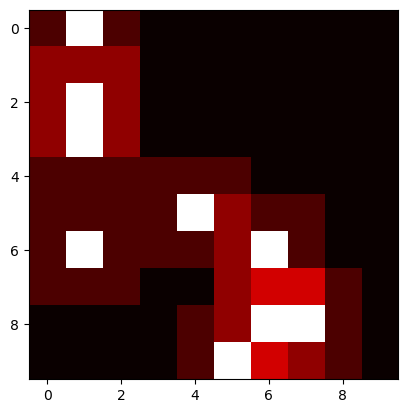

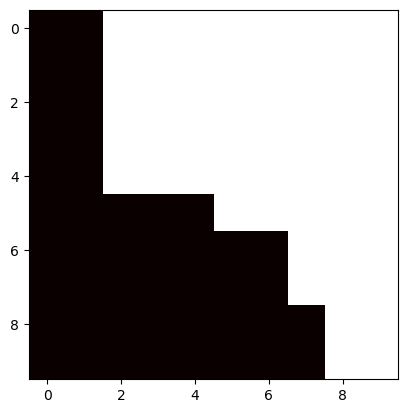

In [29]:
t.reveal(2,5).plot()